[[0.88249974 0.52763662]
 [0.73361302 0.02365601]
 [0.08025075 0.58838353]
 ...
 [0.79393038 0.55154356]
 [0.32452038 0.9971608 ]
 [0.29701948 0.96463268]]


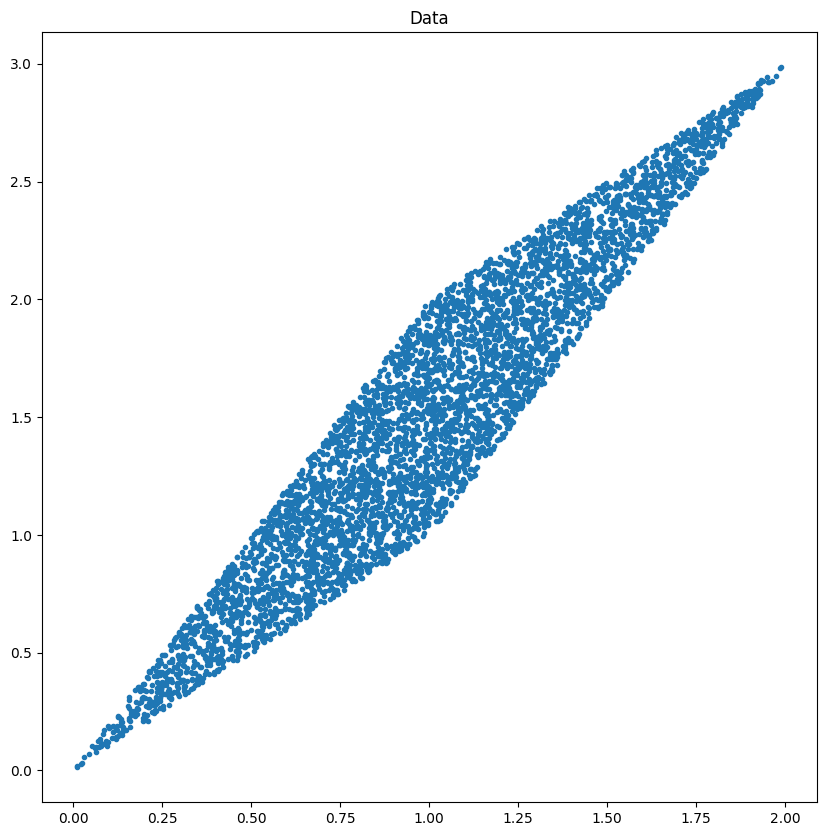

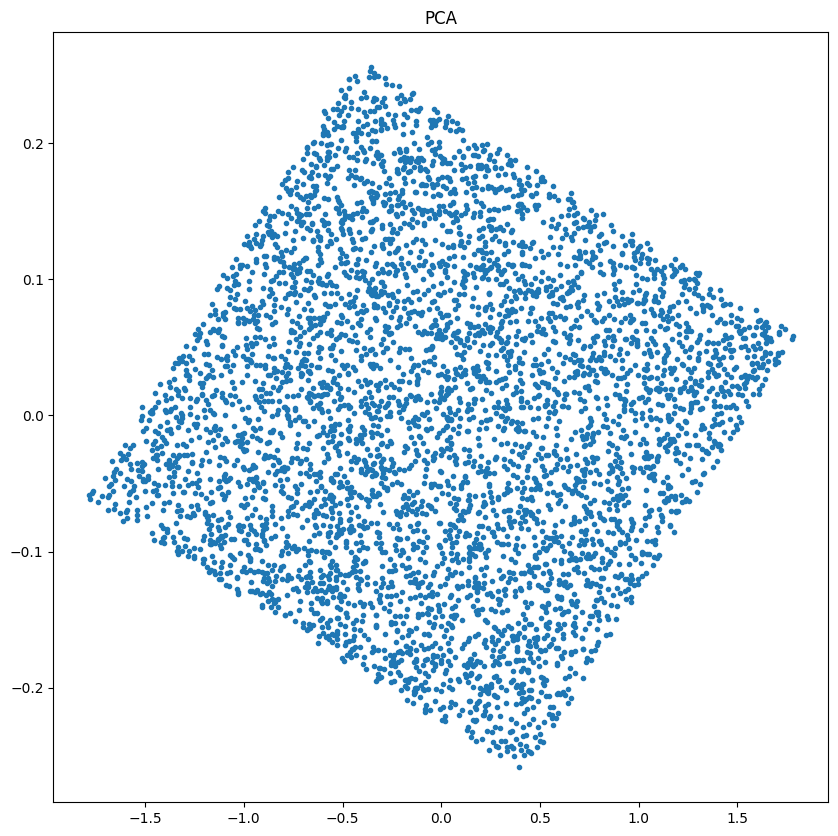

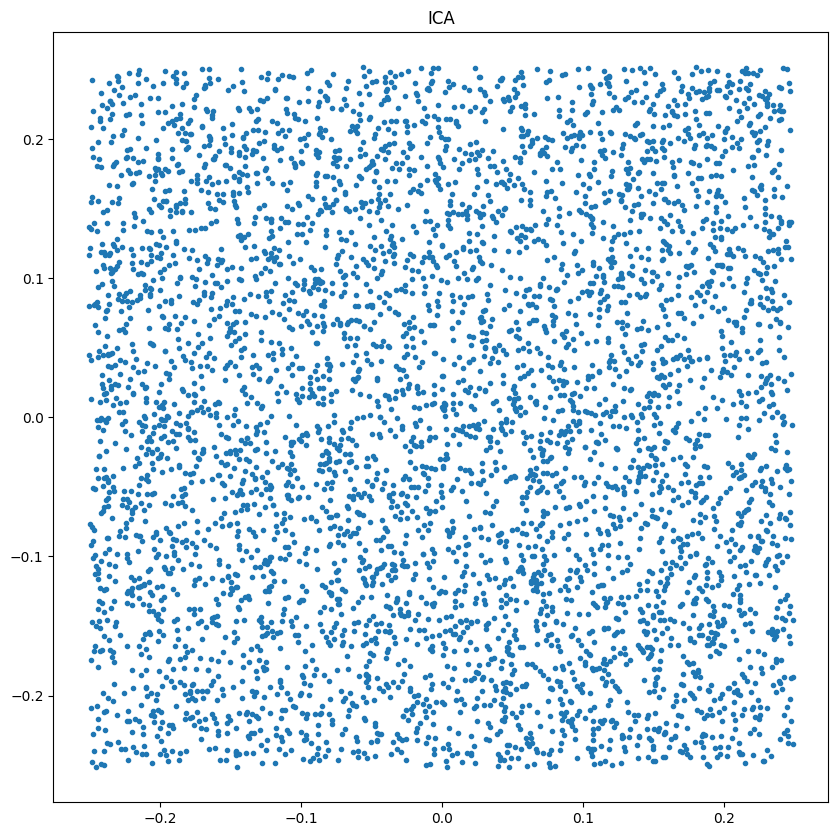

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ICA import ICA

# generate data
N = 5000
r = np.random.rand(N,2)
print(r)

A = np.array([[1, 1], [2, 1]]) # complete the line 
x = (A@r.T).T # complete the line 

# plot generated data
plt.figure(figsize=(10,10))
plt.title('Data')
plt.plot(x[:,0],x[:,1],'.')
plt.show()

# calculate pca
pca = PCA(n_components= np.size(x, 1))
pca.fit(x)  

U = pca.components_ # principal components
V = pca.transform(x)

# plot data projection on principal axis
plt.figure(figsize=(10,10))
plt.title('PCA')
plt.plot(V[:,0],V[:,1],'.')
plt.show()

# calculate ica
mu = 0.1
components = 2
iterations = 200

# Mean across the first (column) axis
col_means = np.mean(x, axis=0)
x = x - col_means

# run ICA
W = ICA(x, mu, components, iterations, 'subGauss')

# Normalize unmixing matrix
W = np.divide(W, np.max(W))

# Compute unmixed signals
y = (W@x.T).T

# plot data projection on ica axis
plt.figure(figsize=(10,10))
plt.title('ICA')
plt.plot(y[:,0],y[:,1],'.')
plt.show()
# %%

c:\Users\jakob\Desktop\UniStuff\02471ML4SP\Week 8\Week_8_python\ICA.py:18: RuntimeWarning: overflow encountered in matmul
  dW =  (np.eye(num_components) - phi(z) @ z.T/N) @ W # complete the line
c:\Users\jakob\Desktop\UniStuff\02471ML4SP\Week 8\Week_8_python\ICA.py:17: RuntimeWarning: invalid value encountered in matmul
  z = W @  x.T # complete the line


Text(0, 0.5, 'cleaned data')

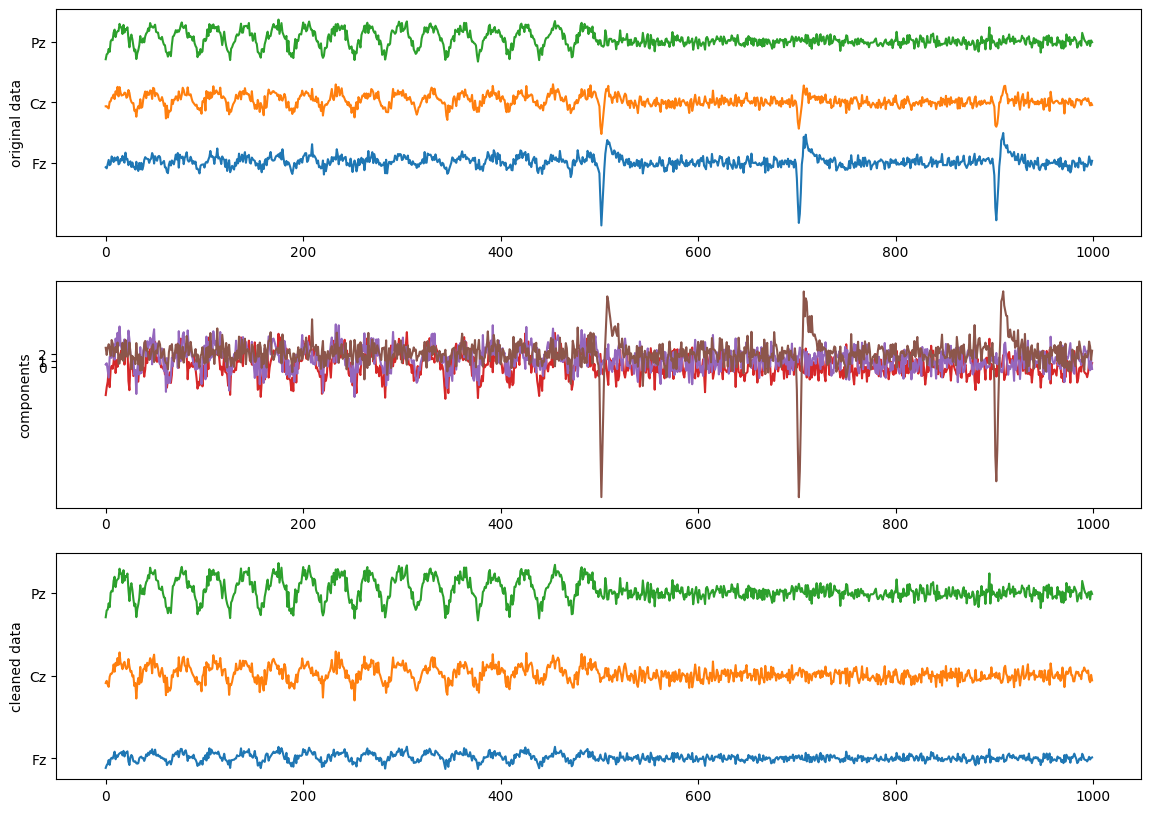

In [2]:
#%%
import numpy as np
import scipy.signal as sps
import scipy.linalg
import matplotlib.pyplot as plt
from ICA import ICA

np.random.seed(42)
n = 1000
fs = 100
noise = 3

# simulate EEG data with eye blinks
t = np.arange(n)
alpha = np.abs(np.sin(10 * t / fs)) - 0.5
alpha[n//2:] = 0
blink = np.zeros(n)
blink[n//2::200] += -1
blink = sps.lfilter(*sps.butter(2, [1*2/fs, 10*2/fs], 'bandpass'), blink)

frontal = blink * 200 + alpha * 10 + np.random.randn(n) * noise
central = blink * 100 + alpha * 15 + np.random.randn(n) * noise
parietal = blink * 10 + alpha * 25 + np.random.randn(n) * noise

eeg = np.stack([frontal, central, parietal]).T  # shape = (100, 3)

# decompose EEG using our ICA implementation and plot components
I = 300 # Number of iterations
num_components = 3 # Number of components

W = ICA(eeg, 0.1, num_components, I, 'superGauss')

# Normalize unmixing matrix
W = np.divide(W, np.max(W))

# Compute unmixed signals
y = (W@eeg.T).T

# plot original data
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(frontal + 50)
plt.plot(central + 100)
plt.plot(parietal + 150)
plt.yticks([50, 100, 150], ['Fz', 'Cz', 'Pz'])
plt.ylabel('original data')

# decompose EEG and plot components
W = ICA(eeg, 0.05, num_components, I, 'superGauss')
components = (W @ eeg.T).T

plt.subplot(3, 1, 2)
plt.plot([[np.nan, np.nan, np.nan]])  # advance the color cycler to give the components a different color :)
plt.plot(components + [0.5, 1.0, 1.5])
plt.yticks([0.5, 1.0, 1.5], ['0', '1', '2'])
plt.ylabel('components')

# looks like component #3 contains the eye blinks
# let's remove them (hard coded)!
components[:, 2] = 0

# reconstruct EEG without blinks
x_reconstruct = scipy.linalg.solve(W, components.T).T

plt.subplot(3, 1, 3)
plt.plot(x_reconstruct + [50, 100, 150])
plt.yticks([50, 100, 150], ['Fz', 'Cz', 'Pz'])
plt.ylabel('cleaned data')